# Analysis of the population growth over the last 120 years

In [371]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read CSV

In [372]:
pop_global_df = pd.read_csv('data/processed/population/population-global.csv', sep=';')
pop_regions_df = pd.read_csv('data/processed/population/population-region.csv', sep=';')
pop_country_df = pd.read_csv('data/processed/population/population-country.csv', sep=';')
dis_global_df = pd.read_csv('data/processed/disaster/disaster-global.csv', sep=',')
dis_region_df = pd.read_csv('data/processed/disaster/disaster-region.csv', sep=',')
dis_country_df = pd.read_csv('data/processed/disaster/disaster-country.csv', sep=',')

In [373]:
un_country_codes = pd.read_csv("data/raw/country-codes/un-country-codes.csv", sep=";")
un_country_codes = un_country_codes[['Region Code', 'Region Name', 'ISO-alpha3 Code']]

In [374]:
dis_region_with_codes = dis_region_df.merge(un_country_codes, how="left", left_on='country_code', right_on='ISO-alpha3 Code')
dis_region_with_codes = dis_region_with_codes[['year','Region Code','type','subtype','deaths']]

## Plot world population


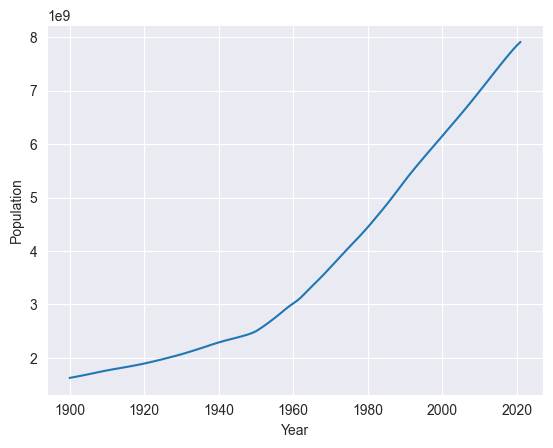

In [375]:
#print(pop_global_df.head(5))
pop_global_df_plot = sns.lineplot(data=pop_global_df, x='year', y='population')
pop_global_df_plot.set_ylabel("Population")
pop_global_df_plot.set_xlabel("Year")
plt.show()

This plot shows the world population from 1900 until 2021. We can observe a significant change in the population growth after WW2 - often referred as the 'boomer generation'. After that, the population growth did not stagnate until now. Let's take a look at the population trend in the specified regions.

# Plot regions population

   region_code region_name  year  population
0          2.0      Africa  1900   138578556
1          2.0      Africa  1901   139018147
2          2.0      Africa  1902   139489077
3          2.0      Africa  1903   139992790
4          2.0      Africa  1904   140510536


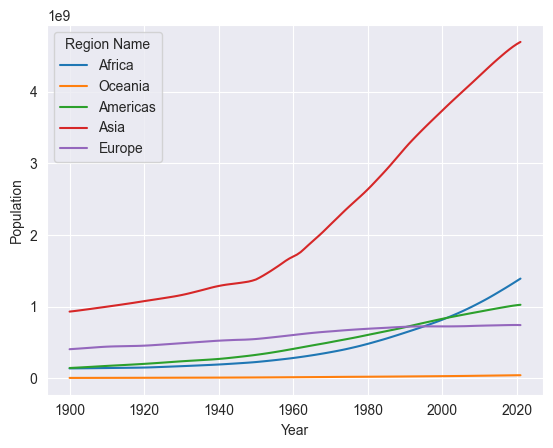

In [376]:
print(pop_regions_df.head(5))
pop_regions_plot = sns.lineplot(data=pop_regions_df, x='year', y='population', estimator=None, hue='region_name')
pop_regions_plot.set_ylabel("Population")
pop_regions_plot.set_xlabel("Year")
pop_regions_plot.get_legend().set_title("Region Name")
plt.show()

The above plot shows the population development of the specified regions. As expected, the population of Asia grew significantly faster, than the population of the other regions. In Europe, the population slightly increased, but with the slowest growing rate. Both America and Africa show an upwards trend since the 1950´s.

# Plot disaster data

In [377]:
#print(dis_global_df.head(5))
#sns.lineplot(data=dis_global_df, x='year', y='deaths', estimator=None, hue='type')

In [378]:
dis_global_df['deaths'] = dis_global_df['deaths'].fillna(0)
dis_global_df['deaths'] = dis_global_df['deaths'].astype(int)

In [379]:
dis_global_df['deaths'].describe().astype(int)

count      14871
mean        1536
std        51114
min            0
25%            0
50%            6
75%           31
max      3700000
Name: deaths, dtype: int64

# Calculate relative deaths

In [380]:
dis_global_with_deaths = dis_global_df[dis_global_df['deaths'] > 0]
dis_global_with_population = pd.merge(dis_global_with_deaths, pop_global_df, how='left', on='year')
dis_global_with_deaths['rel_deaths'] = dis_global_with_population['deaths']/dis_global_with_population['population']
#sns.lineplot(data=dis_global_with_deaths, x='year', y='rel_deaths', estimator=None, hue='type')

/var/folders/hc/r3nrs79s3bd59z2kkrc_kmrm0000gn/T/ipykernel_19138/3916263480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_global_with_deaths['rel_deaths'] = dis_global_with_population['deaths']/dis_global_with_population['population']


   year    rel_deaths
0  1900  7.750283e-04
1  1901  6.794656e-08
2  1902  5.890693e-06
3  1903  7.130338e-08
4  1904  0.000000e+00


<AxesSubplot: xlabel='year', ylabel='rel_deaths'>

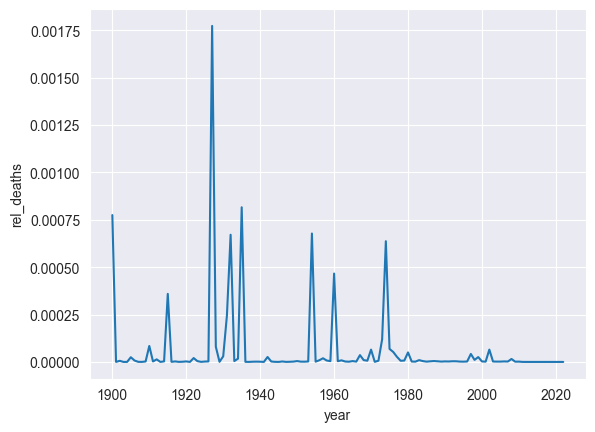

In [381]:
dis_global_with_rel_deaths_count = dis_global_with_deaths.groupby('year').sum("rel_deaths")
dis_global_with_rel_deaths_count.reset_index(inplace=True)
dis_global_with_rel_deaths_count.drop(['Unnamed: 0', 'deaths'], axis=1, inplace=True)
print(dis_global_with_rel_deaths_count.head())
sns.lineplot(data=dis_global_with_rel_deaths_count, x='year', y='rel_deaths')

Calculate relative deaths for regions

In [382]:
print(dis_region_with_codes.head(5))
dis_region_with_codes['deaths'] = dis_region_with_codes['deaths'].fillna(0)
dis_region_with_codes['deaths'] = dis_region_with_codes['deaths'].astype(int)

   year  Region Code               type          subtype     deaths
0  1900          2.0            Drought          Drought    11000.0
1  1900        142.0            Drought          Drought  1250000.0
2  1902         19.0         Earthquake  Ground movement     2000.0
3  1902         19.0  Volcanic activity         Ash fall     1000.0
4  1902         19.0  Volcanic activity         Ash fall     6000.0


Add population to dis_regions

In [383]:
dis_region_with_population = pd.merge(dis_region_with_codes, pop_regions_df, how='left', left_on=['year', 'Region Code'], right_on=['year', 'region_code'])

# Deaths per region

  region_name    deaths
0      Africa    934716
1    Americas    756624
2        Asia  19450184
3      Europe    299980
4     Oceania     15434


<AxesSubplot: xlabel='region_name', ylabel='deaths'>

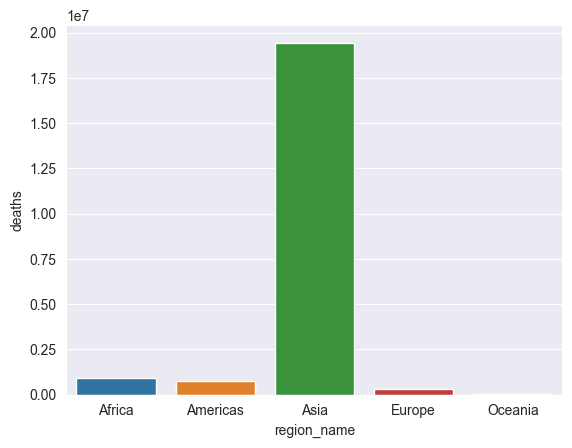

In [384]:
dis_region_sum_deaths = dis_region_with_population.groupby('region_name').sum('deaths')
dis_region_sum_deaths.reset_index(inplace=True)
dis_region_sum_deaths.drop(['year', 'Region Code', 'region_code', 'population'], axis=1, inplace=True)
print(dis_region_sum_deaths.head())
sns.barplot(data=dis_region_sum_deaths, x=dis_region_sum_deaths['region_name'], y=dis_region_sum_deaths['deaths'])

We can see, that the number of deaths per region differ pretty much. Asia recorded over 19 million deaths caused by a natural disaster in the past 120 years. Whereas all other region had under 1 million recorded deaths.

     Region  Occurrence
0    Africa        2002
1  Americas        3802
2      Asia        5983
3    Europe        1852
4   Oceania         653


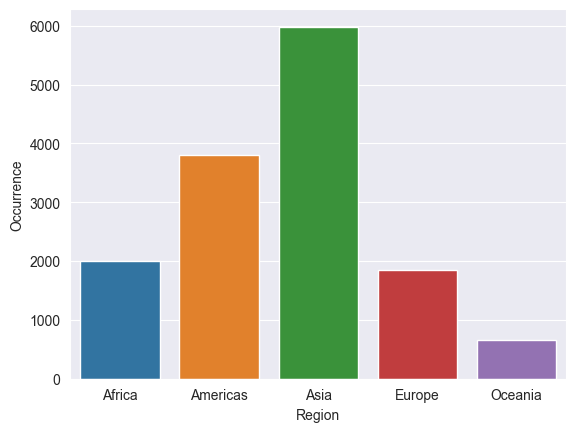

In [385]:
dis_region_occurences = dis_region_with_population.groupby('region_name').count()
dis_region_occurences.drop(['year', 'Region Code', 'type', 'subtype', 'region_code', 'population'], axis=1, inplace=True)
dis_region_occurences.reset_index(inplace=True)
dis_region_occurences.rename(columns={'region_name': 'Region', 'deaths': 'Occurrence'}, inplace=True)
print(dis_region_occurences.head())
sns.barplot(data=dis_region_occurences, x='Region', y='Occurrence')
plt.show()

If we compare the number of occurrences to the number of deaths per region, we see that the proportion of occurrences does not match the number of deaths. This means, that natural disasters in asia are deadlier than on other continents.

Generate Plots with absolut and relative deaths for each region

## America

          disaster type  occurrences
0               Drought          168
1            Earthquake          316
2  Extreme temperature           115
3                 Flood         1282
4             Landslide          189


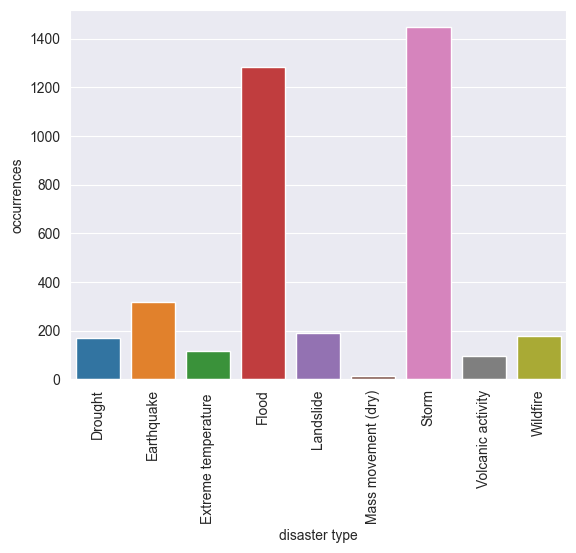

In [386]:
dis_america = dis_region_with_population[dis_region_with_population['region_code'] == 19.0]

#pre processing
dis_america_by_type = dis_america.groupby('type').count()
dis_america_by_type.reset_index(inplace=True)
dis_america_by_type = dis_america_by_type.loc[:, ['type', 'year']]
dis_america_by_type.rename(columns={'year': 'occurrences', 'type': 'disaster type'}, inplace=True)
print(dis_america_by_type.head())

#plot
dis_america_by_type_plot = sns.barplot(data=dis_america_by_type, x=dis_america_by_type['disaster type'], y='occurrences')
dis_america_by_type_plot.tick_params(axis='x', rotation=90)
#dis_america_by_type_plot.legend_.remove()
plt.show()

#dis_america['rel_deaths'] = dis_america['deaths']/dis_america['population']
#sns.lineplot(data=dis_america, x='year', y='deaths', estimator=None, hue='type')
#sns.lineplot(data=dis_america, x='year', y='rel_deaths', estimator=None, hue='type')

Let´s take a look at the natural disasters occurred in america. We can clearly see, that storms and floods are the most frequent natural disasters. For this reason, we will take a close look at those two types.

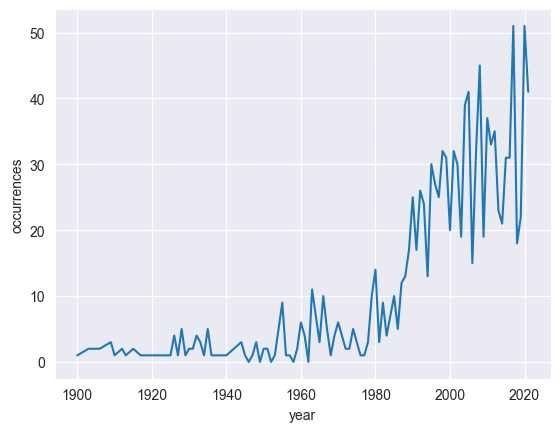

In [387]:
#plot storm and flood
#Todo - add number of deaths to plot
dis_america_storm = dis_america[dis_america['type'] == 'Storm']
dis_america_storm = dis_america_storm.groupby('year').count()
dis_america_storm_plot = sns.lineplot(data=dis_america_storm, x='year', y='subtype')
dis_america_storm_plot.set_ylabel('occurrences')
plt.show()

This plot shows the frequency of storms in america. Since 1990, the frequency of storms highly increased. This observation has many possible reasons. First of all, the infrastructure to record storms developed over the past years. Therefore, it is logical that more storms, even small ones, are documented. Another possible reason is a change in the land and ocean temperatures. Those changes may have an effect on storms and the frequency of storms.

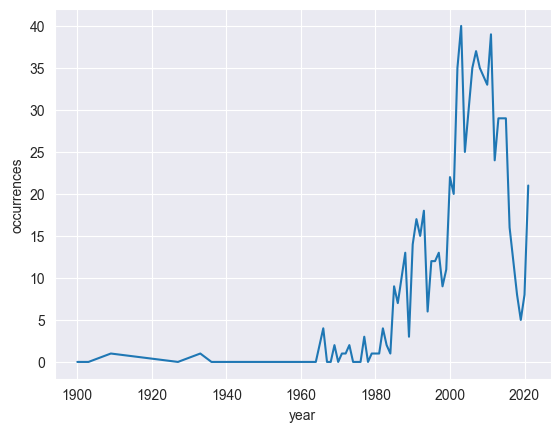

In [388]:
dis_america_flood = dis_america[dis_america['type'] == 'Flood']
dis_america_flood = dis_america_flood.groupby('year').count()
dis_america_flood_plot = sns.lineplot(data=dis_america_flood, x='year', y='subtype')
dis_america_flood_plot.set_ylabel('occurrences')
plt.show()

The second most common natural disaster in america are floods. We see that the documented floods start to increase from the 1980´s. Around the year 2000 we can observe another significant increase in documented floods peaking at 40 floods per year.

## Africa

          disaster type  occurrences
0               Drought          347
1            Earthquake           74
2  Extreme temperature            20
3                 Flood         1154
4             Landslide           59


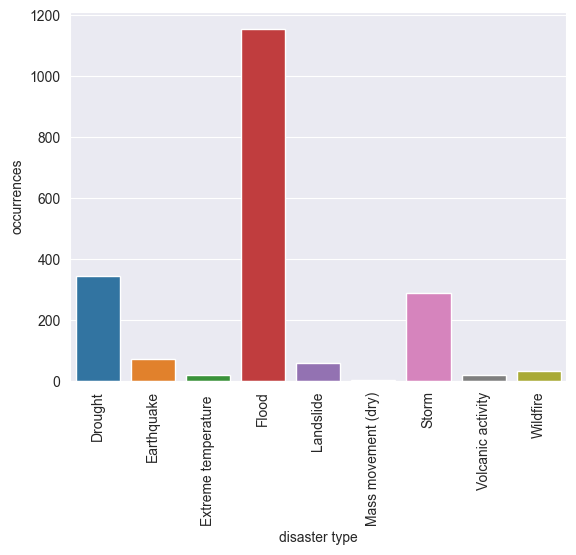

In [389]:
dis_africa = dis_region_with_population[dis_region_with_population['region_code'] == 2.0]

#pre processing
dis_africa_by_type = dis_africa.groupby('type').count()
dis_africa_by_type.reset_index(inplace=True)
dis_africa_by_type = dis_africa_by_type.loc[:, ['type', 'year']]
dis_africa_by_type.rename(columns={'year': 'occurrences', 'type': 'disaster type'}, inplace=True)
print(dis_africa_by_type.head())

#plot
dis_africa_by_type_plot = sns.barplot(data=dis_africa_by_type, x=dis_africa_by_type['disaster type'], y='occurrences')
dis_africa_by_type_plot.tick_params(axis='x', rotation=90)
plt.show()

#dis_africa['rel_deaths'] = dis_africa['deaths']/dis_africa['population']
#sns.lineplot(data=dis_africa, x='year', y='deaths', estimator=None, hue='type')

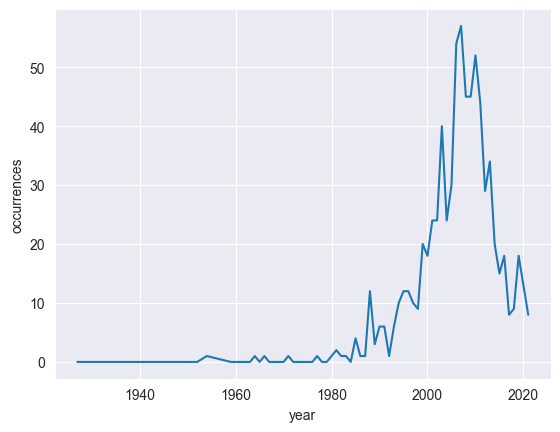

In [390]:
#plot storm and flood
#Todo - add number of deaths to plot
dis_africa_flood = dis_africa[dis_africa['type'] == 'Flood']
dis_africa_flood = dis_africa_flood.groupby('year').count()
dis_africa_flood_plot = sns.lineplot(data=dis_africa_flood, x='year', y='subtype')
dis_africa_flood_plot.set_ylabel('occurrences')
plt.show()

## Asia

           disaster type  occurrences
0                Drought          187
1             Earthquake          870
2   Extreme temperature           184
3                  Flood         2319
4  Glacial lake outburst            2


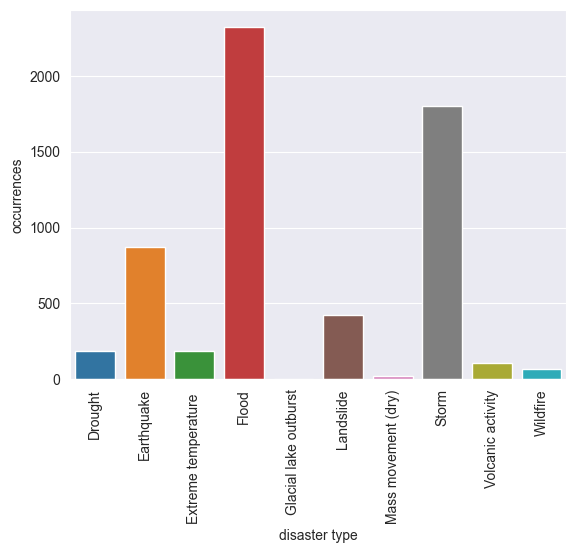

In [391]:
dis_asia = dis_region_with_population[dis_region_with_population['region_code'] == 142.0]

#pre processing
dis_asia_by_type = dis_asia.groupby('type').count()
dis_asia_by_type.reset_index(inplace=True)
dis_asia_by_type = dis_asia_by_type.loc[:, ['type', 'year']]
dis_asia_by_type.rename(columns={'year': 'occurrences', 'type': 'disaster type'}, inplace=True)
print(dis_asia_by_type.head())

#plot
dis_asia_by_type_plot = sns.barplot(data=dis_asia_by_type, x=dis_asia_by_type['disaster type'], y='occurrences')
dis_asia_by_type_plot.tick_params(axis='x', rotation=90)
plt.show()

#dis_asia['rel_deaths'] = dis_asia['deaths']/dis_asia['population']
#dis_asia.sort_values(by=['deaths'], inplace=True, ascending=False)
#sns.lineplot(data=dis_asia, x='year', y='deaths', estimator=None, hue='type')

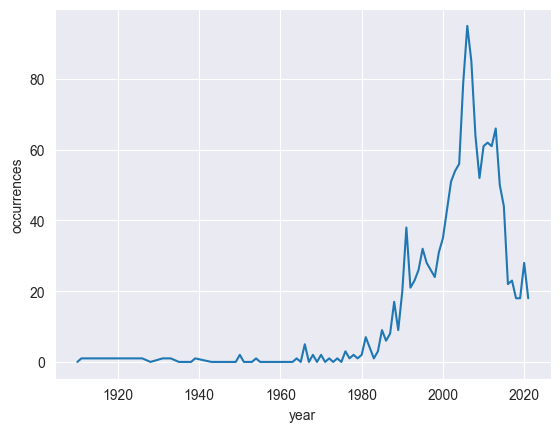

In [392]:
dis_asia_flood = dis_asia[dis_asia['type'] == 'Flood']
dis_asia_flood = dis_asia_flood.groupby('year').count()
dis_asia_flood_plot = sns.lineplot(data=dis_asia_flood, x='year', y='subtype')
dis_asia_flood_plot.set_ylabel('occurrences')
plt.show()

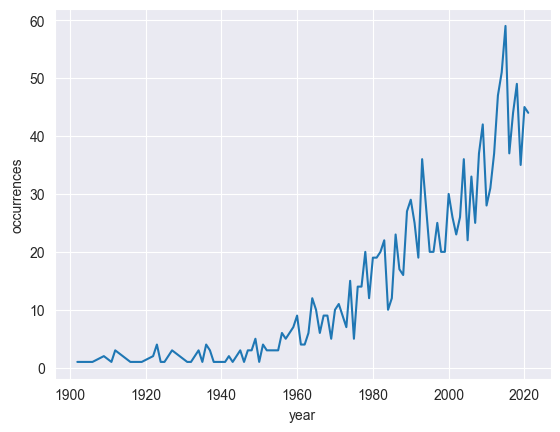

In [393]:
dis_asia_storm = dis_asia[dis_asia['type'] == 'Storm']
dis_asia_storm = dis_asia_storm.groupby('year').count()
dis_asia_storm_plot = sns.lineplot(data=dis_asia_storm, x='year', y='subtype')
dis_asia_storm_plot.set_ylabel('occurrences')
plt.show()

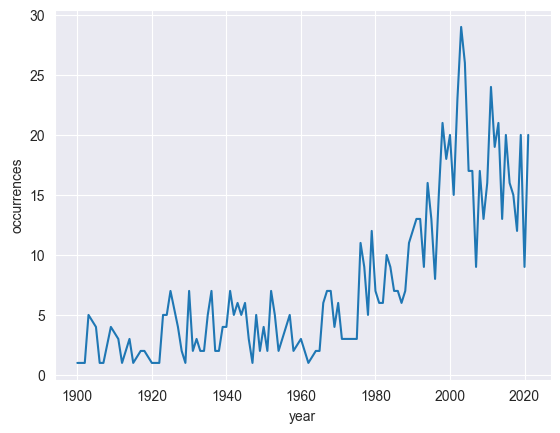

In [394]:
dis_asia_earthquake = dis_asia[dis_asia['type'] == 'Earthquake']
dis_asia_earthquake = dis_asia_earthquake.groupby('year').count()
dis_asia_earthquake_plot = sns.lineplot(data=dis_asia_earthquake, x='year', y='subtype')
dis_asia_earthquake_plot.set_ylabel('occurrences')
plt.show()

## Europe

          disaster type  occurrences
0               Drought           43
1            Earthquake          162
2  Extreme temperature           268
3                 Flood          645
4                   Fog            1


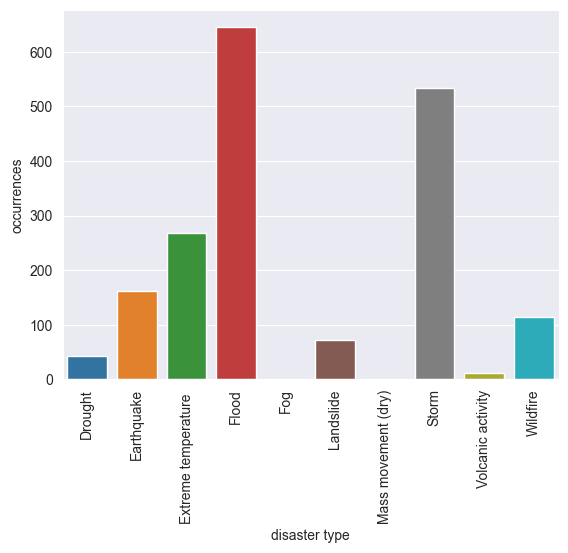

In [395]:
dis_europe = dis_region_with_population[dis_region_with_population['region_code'] == 150.0]

#pre processing
dis_europe_by_type = dis_europe.groupby('type').count()
dis_europe_by_type.reset_index(inplace=True)
dis_europe_by_type = dis_europe_by_type.loc[:, ['type', 'year']]
dis_europe_by_type.rename(columns={'year': 'occurrences', 'type': 'disaster type'}, inplace=True)
print(dis_europe_by_type.head())

#plot
dis_europe_by_type_plot = sns.barplot(data=dis_europe_by_type, x=dis_europe_by_type['disaster type'], y='occurrences')
dis_europe_by_type_plot.tick_params(axis='x', rotation=90)
plt.show()


#dis_europe['rel_deaths'] = dis_europe['deaths']/dis_europe['population']
#sns.lineplot(data=dis_europe, x='year', y='deaths', estimator=None, hue='type')
#sns.lineplot(data=dis_europe, x='year', y='rel_deaths', estimator=None, hue='type')

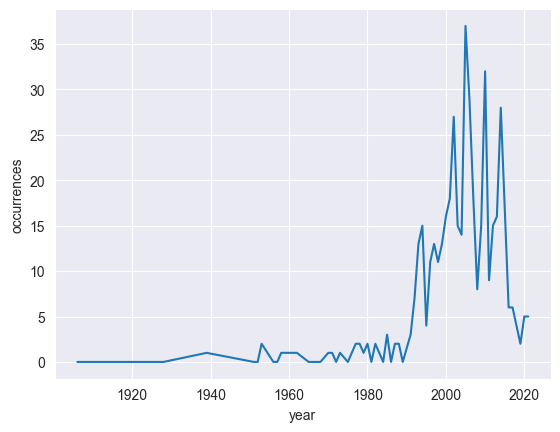

In [396]:
dis_europe_flood = dis_europe[dis_europe['type'] == 'Flood']
dis_europe_flood = dis_europe_flood.groupby('year').count()
dis_europe_flood_plot = sns.lineplot(data=dis_europe_flood, x='year', y='subtype')
dis_europe_flood_plot.set_ylabel('occurrences')
plt.show()

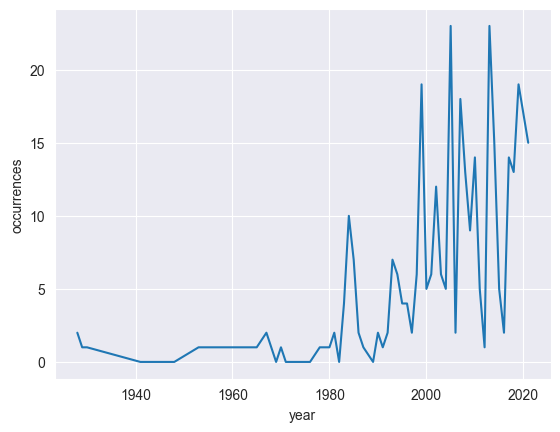

In [397]:
dis_europe_storm = dis_europe[dis_europe['type'] == 'Storm']
dis_europe_storm = dis_europe_storm.groupby('year').count()
dis_europe_storm_plot = sns.lineplot(data=dis_europe_storm, x='year', y='subtype')
dis_europe_storm_plot.set_ylabel('occurrences')
plt.show()

## Oceania

          disaster type  occurrences
0               Drought           32
1            Earthquake           55
2  Extreme temperature             8
3                 Flood          151
4             Landslide           21


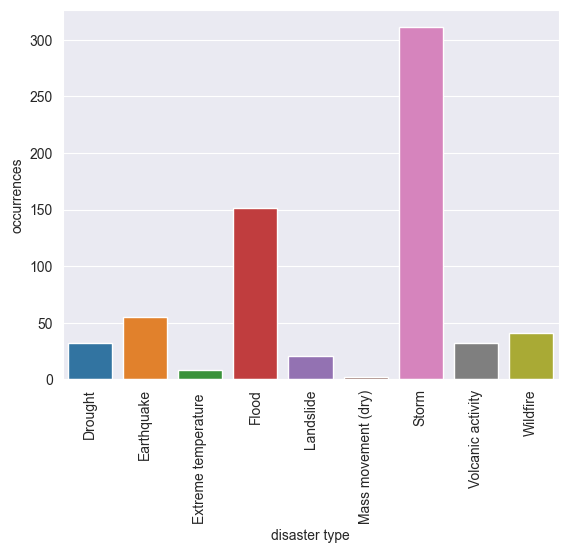

In [398]:
dis_oceania = dis_region_with_population[dis_region_with_population['region_code'] == 9.0]

#pre processing
dis_oceania_by_type = dis_oceania.groupby('type').count()
dis_oceania_by_type.reset_index(inplace=True)
dis_oceania_by_type = dis_oceania_by_type.loc[:, ['type', 'year']]
dis_oceania_by_type.rename(columns={'year': 'occurrences', 'type': 'disaster type'}, inplace=True)
print(dis_oceania_by_type.head())

#plot
dis_oceania_by_type_plot = sns.barplot(data=dis_oceania_by_type, x=dis_oceania_by_type['disaster type'], y='occurrences')
dis_oceania_by_type_plot.tick_params(axis='x', rotation=90)
plt.show()

#dis_oceania['rel_deaths'] = dis_oceania['deaths']/dis_oceania['population']
#sns.lineplot(data=dis_oceania, x='year', y='deaths', estimator=None, hue='type')

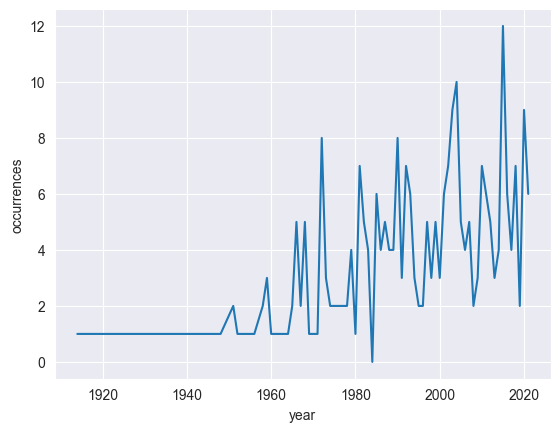

In [399]:
dis_oceania_storm = dis_oceania[dis_oceania['type'] == 'Storm']
dis_oceania_storm = dis_oceania_storm.groupby('year').count()
dis_oceania_storm_plot = sns.lineplot(data=dis_oceania_storm, x='year', y='subtype')
dis_oceania_storm_plot.set_ylabel('occurrences')
plt.show()

# Country

                   country_name      deaths
40                        China  10984915.0
86                        India   4591741.0
15                   Bangladesh   2590902.0
177                Soviet Union   1357423.0
63                     Ethiopia    404750.0
82                        Haiti    245431.0
95                        Japan    239400.0
87                    Indonesia    239103.0
141                    Pakistan    180452.0
88   Iran (Islamic Republic of)    163087.0
181                       Sudan    151683.0
126                     Myanmar    146820.0
93                        Italy    140591.0
125                  Mozambique    104094.0
198                     Türkiye     96483.0
146                        Peru     86304.0
134                       Niger     85900.0
31                   Cabo Verde     85045.0
78                    Guatemala     79497.0
147                 Philippines     70262.0


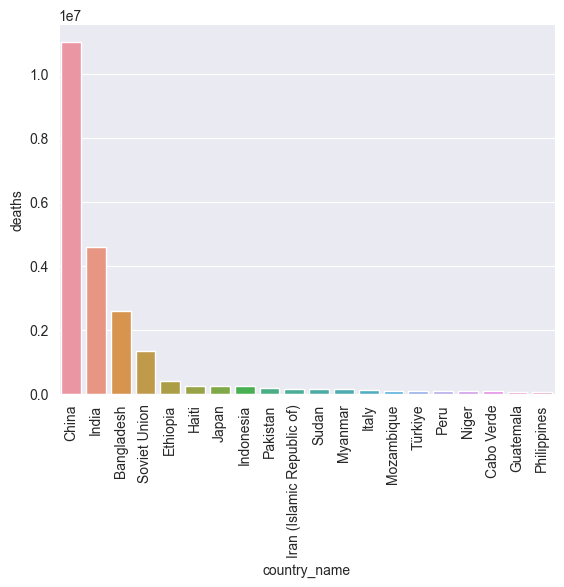

In [400]:
dis_country_sum_deaths = dis_country_df.groupby('country_name').sum('deaths')
dis_country_sum_deaths.reset_index(inplace=True)
dis_country_sum_deaths.drop(['Unnamed: 0', 'year'], axis=1, inplace=True)
dis_country_sum_deaths.sort_values('deaths', inplace=True, ascending=False)
print(dis_country_sum_deaths.head(20))
dis_country_sum_deaths = dis_country_sum_deaths.iloc[0:20, :]
dis_country_sum_deaths_plot = sns.barplot(data=dis_country_sum_deaths, x=dis_country_sum_deaths['country_name'], y=dis_country_sum_deaths['deaths'])
dis_country_sum_deaths_plot.tick_params(axis='x', rotation=90)

plt.show()

          disaster type  occurrences
0               Drought           48
1            Earthquake          203
2  Extreme temperature            15
3                 Flood          338
4             Landslide           81


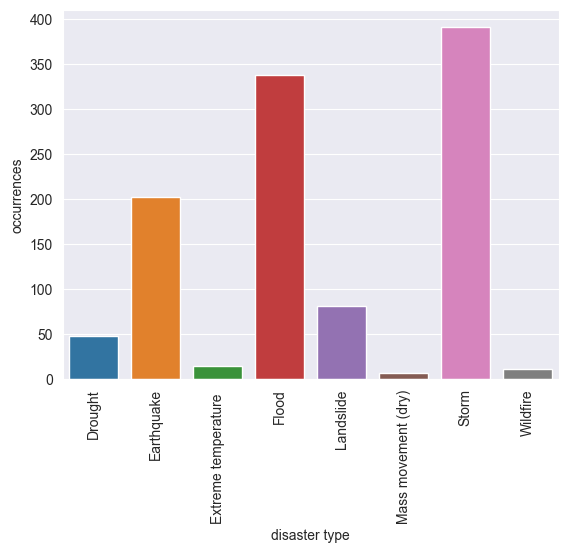

In [401]:
dis_country_china = dis_country_df[dis_country_df['country_name'] == 'China']

#pre processing
dis_country_china_by_type = dis_country_china.groupby('type').count()
dis_country_china_by_type.reset_index(inplace=True)
dis_country_china_by_type = dis_country_china_by_type.loc[:, ['type', 'year']]
dis_country_china_by_type.rename(columns={'year': 'occurrences', 'type': 'disaster type'}, inplace=True)
print(dis_country_china_by_type.head())

#plot
dis_country_china_by_type_plot = sns.barplot(data=dis_country_china_by_type, x=dis_country_china_by_type['disaster type'], y='occurrences')
dis_country_china_by_type_plot.tick_params(axis='x', rotation=90)
plt.show()

In [402]:
dis_country_china_storm = dis_country_china[dis_country_china['type'] == 'Storm']
dis_country_china_storm = dis_country_china_storm.groupby('subtype').count()
print(dis_country_china_storm.head())

                  Unnamed: 0  year  country_name  country_code  type  deaths
subtype                                                                     
Convective storm         112   112           112           112   112     112
Tropical cyclone         231   231           231           231   231     231
